In [1]:
## DATA PREPARATION
from keras.utils import to_categorical
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

with h5py.File('UrbanSound8K_Spectrograms/Urban_spectograms.h5', 'r') as f:

    spectrograms = f['spectrograms']
    labels = f['labels']

    
    X_pretrain = spectrograms[()]
    y_pretrain = labels[()]
    
    mask = np.any(X_pretrain != 0, axis=(1, 2))
    X_pretrain = X_pretrain[mask]
    y_pretrain = y_pretrain[mask]
    
with h5py.File('UrbanSound8K_Augmentation/Urban_spectograms_augmented.h5', 'r') as f:

    spectrograms_aug = f['spectrograms_aug']
    labels_aug = f['labels_aug']

    
    X_pretrain_aug = spectrograms_aug[()]
    y_pretrain_aug = labels_aug[()]
    
    mask_aug = np.any(X_pretrain_aug != 0, axis=(1, 2))
    X_pretrain_aug = X_pretrain_aug[mask_aug]
    y_pretrain_aug = y_pretrain_aug[mask_aug]

with h5py.File('ybss-spectrograms/Ybss-spectrograms.h5', 'r') as f:
    
    test_spec = f['test_spec']
    test_labs = f['test_labs']

    
    X_test = test_spec[()]
    y_test = test_labs[()]
    
    
    train_spec = f['train_spec']
    train_labs = f['train_labs']

    
    X_train = train_spec[()]
    y_train = train_labs[()]
    
with h5py.File('mixing_dataset_0.3/final_dataset_0.3.h5', 'r') as f:

    spectrograms_mix_03 = f['spectrograms_mix']
    labels_mix_03 = f['labels_mix']

    
    X_final_03 = spectrograms_mix_03[()]
    y_final_03 = labels_mix_03[()]
    
    mask_final_03 = np.any(X_final_03 != 0, axis=(1, 2))
    X_final_03 = X_final_03[mask_final_03]
    y_final_03 = y_final_03[mask_final_03]
    
    
with h5py.File('mixing_dataset_0.2/final_dataset_0.2.h5', 'r') as f:

    spectrograms_mix_02 = f['spectrograms_mix']
    labels_mix_02 = f['labels_mix']

    
    X_final_02 = spectrograms_mix_02[()]
    y_final_02 = labels_mix_02[()]
    
    mask_final_02 = np.any(X_final_02 != 0, axis=(1, 2))
    X_final_02 = X_final_02[mask_final_02]
    y_final_02 = y_final_02[mask_final_02]
    
with h5py.File('mixing_dataset_0.1/final_dataset_0.1.h5', 'r') as f:

    spectrograms_mix_01 = f['spectrograms_mix']
    labels_mix_01 = f['labels_mix']

    
    X_final_01 = spectrograms_mix_01[()]
    y_final_01 = labels_mix_01[()]
    
    mask_final_01 = np.any(X_final_01 != 0, axis=(1, 2))
    X_final_01 = X_final_01[mask_final_01]
    y_final_01 = y_final_01[mask_final_01]
    
with h5py.File('mixing_dataset_0.05/final_dataset_0.05.h5', 'r') as f:

    spectrograms_mix_005 = f['spectrograms_mix']
    labels_mix_005 = f['labels_mix']

    
    X_final_005 = spectrograms_mix_005[()]
    y_final_005 = labels_mix_005[()]
    
    mask_final_005 = np.any(X_final_005 != 0, axis=(1, 2))
    X_final_005 = X_final_005[mask_final_005]
    y_final_005 = y_final_005[mask_final_005]


# We one-hot encode the target variables to feed it to the neural network.
y_pretrain = to_categorical(y_pretrain)
y_pretrain_aug = to_categorical(y_pretrain_aug)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
y_final_03 = to_categorical(y_final_03)
y_final_02 = to_categorical(y_final_02)
y_final_01 = to_categorical(y_final_01)
y_final_005 = to_categorical(y_final_005)

# We do train-validation split
#X_pretrain, X_pretest, y_pretrain, y_pretest = train_test_split(X_pretrain, y_pretrain, test_size=0.2, random_state=33)
#X_pretrain_aug, X_pretest_aug, y_pretrain_aug, y_pretest_aug = train_test_split(X_pretrain_aug, y_pretrain_aug, test_size=0.2, random_state=33)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2)
#X_final, X_val_final, y_final, y_val_final = train_test_split(X_final, y_final, test_size=0.2)

2023-04-13 23:09:49.673743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 23:09:49.774969: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-13 23:09:50.365322: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:/home/cc/miniconda3/envs/tf-keras/lib/
2023-04-13 23:09:50.3

In [23]:
### We build the CNN model (Without PreTrain)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf

strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    model = Sequential()
    ## Add model layers
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    model.add(Flatten())
    #model.add(Dense(units=512,activation="relu"))
    #model.add(Dense(units=256,activation="relu"))
    model.add(Dense(10, activation='softmax'))

model.summary()

## Compile model using accuracy to measure model performance, corossentropy as loss measure and adam as optimizer.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## We train the model
hist = model.fit(X_train, y_train, validation_data = (X_validate,y_validate), epochs=60, batch_size=64)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_16 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_17 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 32, 64)       0         
 2D)              

2023-04-13 22:59:41.519758: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 0.2795 - accuracy: 0.9124 - val_loss: 7.1424 - val_accuracy: 0.1125
Epoch 3/60
20/20 [==============================] - 11s 562ms/step - loss: 0.1328 - accuracy: 0.9578 - val_loss: 5.8205 - val_accuracy: 0.1125
Epoch 4/60
20/20 [==============================] - 11s 567ms/step - loss: 0.0771 - accuracy: 0.9773 - val_loss: 5.1912 - val_accuracy: 0.1250
Epoch 5/60
20/20 [==============================] - ETA: 0s - loss: 0.0486 - accuracy: 0.9867

2023-04-13 23:00:15.320532: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 569ms/step - loss: 0.0486 - accuracy: 0.9867 - val_loss: 6.0018 - val_accuracy: 0.1781
Epoch 6/60
20/20 [==============================] - 11s 571ms/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 6.7050 - val_accuracy: 0.1469
Epoch 7/60
20/20 [==============================] - 11s 568ms/step - loss: 0.0401 - accuracy: 0.9859 - val_loss: 5.6967 - val_accuracy: 0.2031
Epoch 8/60
20/20 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9969

2023-04-13 23:00:49.321627: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 7.4516 - val_accuracy: 0.1719
Epoch 9/60
20/20 [==============================] - 11s 563ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 7.1395 - val_accuracy: 0.1719
Epoch 10/60
20/20 [==============================] - 11s 566ms/step - loss: 0.0193 - accuracy: 0.9977 - val_loss: 7.8276 - val_accuracy: 0.1750
Epoch 11/60
20/20 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9992

2023-04-13 23:01:23.075626: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 6.9571 - val_accuracy: 0.1531
Epoch 12/60
10/20 [==============>...............] - ETA: 5s - loss: 0.0025 - accuracy: 1.0000

KeyboardInterrupt: 

In [3]:
### We build the CNN model (With PreTrain using UrbanSound8K dataset USING KFOLD IN PRETRAINING)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.initializers import glorot_uniform
from keras.optimizers import Adam, SGD
from sklearn.model_selection import KFold


#Pre train
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    pretrain = Sequential()
    ## Add model layers
    # Block 1
    pretrain.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Block 2
    pretrain.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Block 3
    pretrain.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Block 4
    pretrain.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    pretrain.add(BatchNormalization())
    pretrain.add(MaxPool2D((2, 2)))

    # Last max pool layer
    pretrain.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    pretrain.add(Flatten())
    #pretrain.add(Dense(units=512,activation="relu"))
    #pretrain.add(Dense(units=256,activation="relu"))
    pretrain.add(Dense(10, activation='softmax'))


pretrain.summary()
pretrain.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Define the number of folds for cross-validation
k = 10
kf = KFold(n_splits=k, shuffle=True)

# Train and evaluate the model using 10-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X_pretrain_aug, y_pretrain_aug)):
    print(f'Fold {fold + 1}')
    train_x, val_x = X_pretrain_aug[train_idx], X_pretrain_aug[val_idx]
    train_y, val_y = y_pretrain_aug[train_idx], y_pretrain_aug[val_idx]
    hist_pretrain = pretrain.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=10, batch_size=64)
    

pretrain.save('my_lastest_model.h5')

# Classify the final dataset
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    model = Sequential()
    ## Add model layers
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    model.add(Flatten())
    model.load_weights('my_lastest_model.h5', by_name=True)
    #model.add(Dense(units=512,activation="relu"))
    #model.add(Dense(units=256,activation="relu"))
    model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))

    

model.summary()
# Freeze all convolutional layers
#for layer in model.layers:
#    if 'conv' in layer.name:
#        layer.trainable = False
    
trainable_layers = [layer for layer in model.layers if layer.trainable]

# Count the number of frozen layers
num_frozen_layers = len(model.layers) - len(trainable_layers)

print("Number of frozen layers: ", num_frozen_layers)

# We randomly initialize the weights of the classification part

adam_final = Adam(learning_rate=0.0001)
SGD_final = SGD(learning_rate=0.0001)
model.compile(optimizer=adam_final, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=150, batch_size=64)
model.save('final_model.h5')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_8 (Batc  (None, 127, 64, 64)      256       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_9 (Batc  (None, 127, 64, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 32, 64)       0         
 2D)              

2023-04-13 23:16:19.805977: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - ETA: 0s - loss: 2.0825 - accuracy: 0.3343

2023-04-13 23:17:23.124559: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 67s 537ms/step - loss: 2.0825 - accuracy: 0.3343 - val_loss: 3.8595 - val_accuracy: 0.1171
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 1.3341 - accuracy: 0.5263

2023-04-13 23:18:26.529352: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 531ms/step - loss: 1.3341 - accuracy: 0.5263 - val_loss: 2.5678 - val_accuracy: 0.2874
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 1.0206 - accuracy: 0.6489

2023-04-13 23:19:27.639304: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 1.0206 - accuracy: 0.6489 - val_loss: 3.6144 - val_accuracy: 0.2826
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.8162 - accuracy: 0.7240

2023-04-13 23:20:28.843627: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.8162 - accuracy: 0.7240 - val_loss: 1.4015 - val_accuracy: 0.5954
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.6699 - accuracy: 0.7729

2023-04-13 23:21:30.370549: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.6699 - accuracy: 0.7729 - val_loss: 1.1853 - val_accuracy: 0.6316
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.8095

2023-04-13 23:22:31.680354: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.5627 - accuracy: 0.8095 - val_loss: 2.5656 - val_accuracy: 0.4312
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.4358 - accuracy: 0.8514

2023-04-13 23:23:32.753053: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.4358 - accuracy: 0.8514 - val_loss: 1.8260 - val_accuracy: 0.5700
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.3486 - accuracy: 0.8764

2023-04-13 23:24:34.035698: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.3486 - accuracy: 0.8764 - val_loss: 1.3447 - val_accuracy: 0.5990
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.3008 - accuracy: 0.8947

2023-04-13 23:25:35.559465: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.3008 - accuracy: 0.8947 - val_loss: 1.7941 - val_accuracy: 0.5713
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.2922 - accuracy: 0.8997

2023-04-13 23:26:36.728850: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.2922 - accuracy: 0.8997 - val_loss: 9.0301 - val_accuracy: 0.2959
Fold 2
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.3245 - accuracy: 0.8915

2023-04-13 23:27:38.402320: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.3245 - accuracy: 0.8915 - val_loss: 6.1312 - val_accuracy: 0.3345
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.1827 - accuracy: 0.9361

2023-04-13 23:28:39.509722: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 0.1827 - accuracy: 0.9361 - val_loss: 1.9641 - val_accuracy: 0.6389
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9467

2023-04-13 23:29:40.816247: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.1558 - accuracy: 0.9467 - val_loss: 0.6214 - val_accuracy: 0.8152
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0991 - accuracy: 0.9698

2023-04-13 23:30:41.967971: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0991 - accuracy: 0.9698 - val_loss: 4.7286 - val_accuracy: 0.4263
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.1019 - accuracy: 0.9660

2023-04-13 23:31:43.751759: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.1019 - accuracy: 0.9660 - val_loss: 2.4492 - val_accuracy: 0.5543
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9745

2023-04-13 23:32:44.761215: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 0.0770 - accuracy: 0.9745 - val_loss: 1.0332 - val_accuracy: 0.7681
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.1040 - accuracy: 0.9647

2023-04-13 23:33:45.913926: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.1040 - accuracy: 0.9647 - val_loss: 0.7209 - val_accuracy: 0.7911
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0845 - accuracy: 0.9727

2023-04-13 23:34:47.053902: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0845 - accuracy: 0.9727 - val_loss: 1.4949 - val_accuracy: 0.6884
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0567 - accuracy: 0.9835

2023-04-13 23:35:48.018542: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 520ms/step - loss: 0.0567 - accuracy: 0.9835 - val_loss: 3.0855 - val_accuracy: 0.5362
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0937 - accuracy: 0.9676

2023-04-13 23:36:49.517254: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0937 - accuracy: 0.9676 - val_loss: 0.7509 - val_accuracy: 0.8056
Fold 3
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.1894 - accuracy: 0.9405

2023-04-13 23:37:51.254139: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.1894 - accuracy: 0.9405 - val_loss: 1.5455 - val_accuracy: 0.6763
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9601

2023-04-13 23:38:52.783275: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.1229 - accuracy: 0.9601 - val_loss: 1.1092 - val_accuracy: 0.7319
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0709 - accuracy: 0.9773

2023-04-13 23:39:54.165937: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0709 - accuracy: 0.9773 - val_loss: 2.3768 - val_accuracy: 0.5906
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9899

2023-04-13 23:40:55.564865: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0366 - accuracy: 0.9899 - val_loss: 0.4647 - val_accuracy: 0.8623
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9889

2023-04-13 23:41:57.049347: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.6384 - val_accuracy: 0.8370
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.1559 - accuracy: 0.9515

2023-04-13 23:42:58.243141: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.1559 - accuracy: 0.9515 - val_loss: 4.4937 - val_accuracy: 0.4746
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0928 - accuracy: 0.9691

2023-04-13 23:43:59.742349: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.0928 - accuracy: 0.9691 - val_loss: 0.9959 - val_accuracy: 0.7524
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9687

2023-04-13 23:45:01.133047: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0983 - accuracy: 0.9687 - val_loss: 2.6396 - val_accuracy: 0.5797
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9808

2023-04-13 23:46:02.382784: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0581 - accuracy: 0.9808 - val_loss: 1.8743 - val_accuracy: 0.6655
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0303 - accuracy: 0.9901

2023-04-13 23:47:03.739975: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.4422 - val_accuracy: 0.8696
Fold 4
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0665 - accuracy: 0.9778

2023-04-13 23:48:05.746461: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0665 - accuracy: 0.9778 - val_loss: 0.5590 - val_accuracy: 0.8609
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0853 - accuracy: 0.9715

2023-04-13 23:49:06.784047: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 521ms/step - loss: 0.0853 - accuracy: 0.9715 - val_loss: 3.9794 - val_accuracy: 0.4970
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9715

2023-04-13 23:50:07.956322: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0885 - accuracy: 0.9715 - val_loss: 3.8040 - val_accuracy: 0.5115
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.1061 - accuracy: 0.9649

2023-04-13 23:51:09.332051: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.1061 - accuracy: 0.9649 - val_loss: 4.1992 - val_accuracy: 0.4909
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9843

2023-04-13 23:52:10.851189: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 3.0548 - val_accuracy: 0.5877
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.9864

2023-04-13 23:53:12.092667: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0395 - accuracy: 0.9864 - val_loss: 0.6391 - val_accuracy: 0.8319
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9811

2023-04-13 23:54:13.232422: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0551 - accuracy: 0.9811 - val_loss: 1.6051 - val_accuracy: 0.6759
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.9777

2023-04-13 23:55:14.315522: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 0.0680 - accuracy: 0.9777 - val_loss: 1.0760 - val_accuracy: 0.7932
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.9891

2023-04-13 23:56:15.445802: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 1.8130 - val_accuracy: 0.6747
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9889

2023-04-13 23:57:16.577275: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 1.1072 - val_accuracy: 0.7823
Fold 5
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9867

2023-04-13 23:58:18.633600: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 4.6339 - val_accuracy: 0.4148
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9868

2023-04-13 23:59:20.326059: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 2.8797 - val_accuracy: 0.5744
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0467 - accuracy: 0.9862

2023-04-14 00:00:22.203347: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 529ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.2529 - val_accuracy: 0.9323
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0514 - accuracy: 0.9851

2023-04-14 00:01:23.868594: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0514 - accuracy: 0.9851 - val_loss: 0.6306 - val_accuracy: 0.8513
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0807 - accuracy: 0.9766

2023-04-14 00:02:25.659139: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0807 - accuracy: 0.9766 - val_loss: 2.1938 - val_accuracy: 0.6868
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.1081 - accuracy: 0.9671

2023-04-14 00:03:27.566590: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 529ms/step - loss: 0.1081 - accuracy: 0.9671 - val_loss: 6.5616 - val_accuracy: 0.4849
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0923 - accuracy: 0.9738

2023-04-14 00:04:29.036684: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 526ms/step - loss: 0.0923 - accuracy: 0.9738 - val_loss: 4.5443 - val_accuracy: 0.5175
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9847

2023-04-14 00:05:30.608026: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.0431 - accuracy: 0.9847 - val_loss: 2.2460 - val_accuracy: 0.6421
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9866

2023-04-14 00:06:31.706794: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0378 - accuracy: 0.9866 - val_loss: 9.8628 - val_accuracy: 0.3664
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9933

2023-04-14 00:07:32.683794: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 521ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 2.8197 - val_accuracy: 0.6602
Fold 6
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9878

2023-04-14 00:08:35.010872: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 529ms/step - loss: 0.0359 - accuracy: 0.9878 - val_loss: 0.3933 - val_accuracy: 0.8900
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.9875

2023-04-14 00:09:37.304397: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 533ms/step - loss: 0.0414 - accuracy: 0.9875 - val_loss: 0.5899 - val_accuracy: 0.8755
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9833

2023-04-14 00:10:39.731997: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 533ms/step - loss: 0.0547 - accuracy: 0.9833 - val_loss: 15.7673 - val_accuracy: 0.2346
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9832

2023-04-14 00:11:42.105697: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 534ms/step - loss: 0.0650 - accuracy: 0.9832 - val_loss: 1.8034 - val_accuracy: 0.7570
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0668 - accuracy: 0.9803

2023-04-14 00:12:44.568987: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 533ms/step - loss: 0.0668 - accuracy: 0.9803 - val_loss: 8.7815 - val_accuracy: 0.3519
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0419 - accuracy: 0.9871

2023-04-14 00:13:46.870486: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 533ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.6457 - val_accuracy: 0.8682
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9889

2023-04-14 00:14:49.306213: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 534ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.1267 - val_accuracy: 0.9649
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9914

2023-04-14 00:15:52.418554: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 540ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.5596 - val_accuracy: 0.8755
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9937

2023-04-14 00:16:55.443359: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 539ms/step - loss: 0.0221 - accuracy: 0.9937 - val_loss: 1.9140 - val_accuracy: 0.7062
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0096 - accuracy: 0.9974

2023-04-14 00:17:58.161127: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 536ms/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 0.5344 - val_accuracy: 0.8924
Fold 7
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9927

2023-04-14 00:19:01.664287: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 540ms/step - loss: 0.0273 - accuracy: 0.9927 - val_loss: 0.8047 - val_accuracy: 0.8476
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9899

2023-04-14 00:20:04.483047: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 538ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.1981 - val_accuracy: 0.9492
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9816

2023-04-14 00:21:07.556574: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 539ms/step - loss: 0.0579 - accuracy: 0.9816 - val_loss: 0.2810 - val_accuracy: 0.9444
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0921 - accuracy: 0.9748

2023-04-14 00:22:10.541952: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 539ms/step - loss: 0.0921 - accuracy: 0.9748 - val_loss: 5.7443 - val_accuracy: 0.4788
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.1371 - accuracy: 0.9649

2023-04-14 00:23:13.315475: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 536ms/step - loss: 0.1371 - accuracy: 0.9649 - val_loss: 6.6549 - val_accuracy: 0.4450
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9871

2023-04-14 00:24:16.276398: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 538ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.8318 - val_accuracy: 0.8053
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9944

2023-04-14 00:25:19.407630: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 540ms/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 4.2328 - val_accuracy: 0.5695
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9946

2023-04-14 00:26:22.345998: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 539ms/step - loss: 0.0219 - accuracy: 0.9946 - val_loss: 0.7013 - val_accuracy: 0.8779
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9965

2023-04-14 00:27:25.140293: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 536ms/step - loss: 0.0091 - accuracy: 0.9965 - val_loss: 0.3399 - val_accuracy: 0.9141
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9976

2023-04-14 00:28:28.258842: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 540ms/step - loss: 0.0093 - accuracy: 0.9976 - val_loss: 0.1002 - val_accuracy: 0.9698
Fold 8
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9942

2023-04-14 00:29:31.722532: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 63s 540ms/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 2.8222 - val_accuracy: 0.6554
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9942

2023-04-14 00:30:33.973938: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 531ms/step - loss: 0.0220 - accuracy: 0.9942 - val_loss: 2.0644 - val_accuracy: 0.6796
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0839 - accuracy: 0.9793

2023-04-14 00:31:35.945515: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 530ms/step - loss: 0.0839 - accuracy: 0.9793 - val_loss: 5.6438 - val_accuracy: 0.3857
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0797 - accuracy: 0.9786

2023-04-14 00:32:37.275289: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0797 - accuracy: 0.9786 - val_loss: 1.3224 - val_accuracy: 0.7763
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9876

2023-04-14 00:33:38.659313: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.1416 - val_accuracy: 0.9601
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9934

2023-04-14 00:34:40.175291: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 0.7188 - val_accuracy: 0.8573
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9923

2023-04-14 00:35:41.549507: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0319 - accuracy: 0.9923 - val_loss: 1.8040 - val_accuracy: 0.6868
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 0.9909

2023-04-14 00:36:43.283307: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.3162 - val_accuracy: 0.9432
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0551 - accuracy: 0.9844

2023-04-14 00:37:44.747439: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.0551 - accuracy: 0.9844 - val_loss: 15.5831 - val_accuracy: 0.1862
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 0.9972

2023-04-14 00:38:45.981823: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0117 - accuracy: 0.9972 - val_loss: 0.6275 - val_accuracy: 0.8706
Fold 9
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 0.9933

2023-04-14 00:39:47.840249: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 526ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 4.1309 - val_accuracy: 0.5659
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9918

2023-04-14 00:40:49.142244: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.1638 - val_accuracy: 0.9565
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9918

2023-04-14 00:41:50.578469: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0304 - accuracy: 0.9918 - val_loss: 1.6573 - val_accuracy: 0.7751
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9889

2023-04-14 00:42:52.230855: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 527ms/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 1.9160 - val_accuracy: 0.7751
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9956

2023-04-14 00:43:53.965045: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.1161 - val_accuracy: 0.9734
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9917

2023-04-14 00:44:55.405420: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0308 - accuracy: 0.9917 - val_loss: 0.0740 - val_accuracy: 0.9758
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9979

2023-04-14 00:45:56.433006: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 0.0054 - accuracy: 0.9979 - val_loss: 0.2249 - val_accuracy: 0.9407
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9946

2023-04-14 00:46:57.803041: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0240 - accuracy: 0.9946 - val_loss: 1.1484 - val_accuracy: 0.8053
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 0.0313 - accuracy: 0.9910

2023-04-14 00:47:59.485719: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 62s 528ms/step - loss: 0.0313 - accuracy: 0.9910 - val_loss: 0.6774 - val_accuracy: 0.8670
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9856

2023-04-14 00:49:01.029232: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0488 - accuracy: 0.9856 - val_loss: 0.4824 - val_accuracy: 0.8912
Fold 10
Epoch 1/10
117/117 [==============================] - ETA: 0s - loss: 0.0602 - accuracy: 0.9843

2023-04-14 00:50:02.672964: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0602 - accuracy: 0.9843 - val_loss: 0.3567 - val_accuracy: 0.9178
Epoch 2/10
117/117 [==============================] - ETA: 0s - loss: 0.0310 - accuracy: 0.9909

2023-04-14 00:51:04.055668: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0310 - accuracy: 0.9909 - val_loss: 7.2557 - val_accuracy: 0.4571
Epoch 3/10
117/117 [==============================] - ETA: 0s - loss: 0.0422 - accuracy: 0.9889

2023-04-14 00:52:05.427276: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 0.0422 - accuracy: 0.9889 - val_loss: 0.2232 - val_accuracy: 0.9468
Epoch 4/10
117/117 [==============================] - ETA: 0s - loss: 0.0452 - accuracy: 0.9882

2023-04-14 00:53:06.544445: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 0.0452 - accuracy: 0.9882 - val_loss: 1.7820 - val_accuracy: 0.7533
Epoch 5/10
117/117 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9903

2023-04-14 00:54:07.863017: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0333 - accuracy: 0.9903 - val_loss: 7.1748 - val_accuracy: 0.4099
Epoch 6/10
117/117 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9946

2023-04-14 00:55:09.162009: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 0.0195 - accuracy: 0.9946 - val_loss: 0.2547 - val_accuracy: 0.9480
Epoch 7/10
117/117 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9980

2023-04-14 00:56:10.190002: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 522ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.3171 - val_accuracy: 0.9323
Epoch 8/10
117/117 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997  

2023-04-14 00:57:11.405928: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 523ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2699 - val_accuracy: 0.9432
Epoch 9/10
117/117 [==============================] - ETA: 0s - loss: 4.2009e-04 - accuracy: 1.0000

2023-04-14 00:58:12.654195: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 524ms/step - loss: 4.2009e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 10/10
117/117 [==============================] - ETA: 0s - loss: 3.1783e-04 - accuracy: 1.0000

2023-04-14 00:59:14.106096: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


117/117 [==============================] - 61s 525ms/step - loss: 3.1783e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_16 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_17 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
            

2023-04-14 00:59:54.142765: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 0.0231 - accuracy: 0.9969 - val_loss: 2.6937 - val_accuracy: 0.0875
Epoch 4/150
20/20 [==============================] - 11s 559ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 3.0306 - val_accuracy: 0.0875
Epoch 5/150
20/20 [==============================] - 11s 561ms/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 3.4311 - val_accuracy: 0.0875
Epoch 6/150
20/20 [==============================] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000

2023-04-14 01:00:27.550797: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 3.8566 - val_accuracy: 0.1250
Epoch 7/150
20/20 [==============================] - 11s 563ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 4.3239 - val_accuracy: 0.1281
Epoch 8/150
20/20 [==============================] - 11s 560ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 4.7767 - val_accuracy: 0.1125
Epoch 9/150
20/20 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

2023-04-14 01:01:01.016587: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 5.1541 - val_accuracy: 0.1063
Epoch 10/150
20/20 [==============================] - 11s 562ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 5.4900 - val_accuracy: 0.1063
Epoch 11/150
20/20 [==============================] - 11s 557ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 5.8546 - val_accuracy: 0.1063
Epoch 12/150
20/20 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

2023-04-14 01:01:34.488115: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.0954 - val_accuracy: 0.1063
Epoch 13/150
20/20 [==============================] - 11s 556ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.1284 - val_accuracy: 0.1063
Epoch 14/150
20/20 [==============================] - 11s 558ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 6.0630 - val_accuracy: 0.1094
Epoch 15/150
20/20 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

2023-04-14 01:02:07.681340: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 556ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 5.4121 - val_accuracy: 0.1187
Epoch 16/150
20/20 [==============================] - 11s 554ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.8775 - val_accuracy: 0.1281
Epoch 17/150
20/20 [==============================] - 11s 558ms/step - loss: 7.2561e-04 - accuracy: 1.0000 - val_loss: 4.2565 - val_accuracy: 0.1562
Epoch 18/150
20/20 [==============================] - ETA: 0s - loss: 6.9153e-04 - accuracy: 1.0000

2023-04-14 01:02:40.935536: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 6.9153e-04 - accuracy: 1.0000 - val_loss: 3.5176 - val_accuracy: 0.2250
Epoch 19/150
20/20 [==============================] - 11s 557ms/step - loss: 5.4963e-04 - accuracy: 1.0000 - val_loss: 2.7949 - val_accuracy: 0.3125
Epoch 20/150
20/20 [==============================] - 11s 559ms/step - loss: 5.4627e-04 - accuracy: 1.0000 - val_loss: 2.2042 - val_accuracy: 0.3938
Epoch 21/150
20/20 [==============================] - ETA: 0s - loss: 5.1355e-04 - accuracy: 1.0000

2023-04-14 01:03:14.232609: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 557ms/step - loss: 5.1355e-04 - accuracy: 1.0000 - val_loss: 1.5944 - val_accuracy: 0.5094
Epoch 22/150
20/20 [==============================] - 11s 560ms/step - loss: 6.2066e-04 - accuracy: 1.0000 - val_loss: 1.1174 - val_accuracy: 0.6406
Epoch 23/150
20/20 [==============================] - 11s 557ms/step - loss: 6.3155e-04 - accuracy: 1.0000 - val_loss: 0.7541 - val_accuracy: 0.7437
Epoch 24/150
20/20 [==============================] - ETA: 0s - loss: 5.6357e-04 - accuracy: 1.0000

2023-04-14 01:03:47.653468: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 5.6357e-04 - accuracy: 1.0000 - val_loss: 0.5008 - val_accuracy: 0.8375
Epoch 25/150
20/20 [==============================] - 11s 563ms/step - loss: 3.8942e-04 - accuracy: 1.0000 - val_loss: 0.3495 - val_accuracy: 0.8750
Epoch 26/150
20/20 [==============================] - 11s 553ms/step - loss: 3.5859e-04 - accuracy: 1.0000 - val_loss: 0.2573 - val_accuracy: 0.9062
Epoch 27/150
20/20 [==============================] - ETA: 0s - loss: 3.0921e-04 - accuracy: 1.0000

2023-04-14 01:04:21.029878: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 3.0921e-04 - accuracy: 1.0000 - val_loss: 0.1958 - val_accuracy: 0.9312
Epoch 28/150
20/20 [==============================] - 11s 556ms/step - loss: 7.2075e-04 - accuracy: 1.0000 - val_loss: 0.1521 - val_accuracy: 0.9531
Epoch 29/150
20/20 [==============================] - 11s 560ms/step - loss: 3.3064e-04 - accuracy: 1.0000 - val_loss: 0.1234 - val_accuracy: 0.9563
Epoch 30/150
20/20 [==============================] - ETA: 0s - loss: 3.7578e-04 - accuracy: 1.0000

2023-04-14 01:04:54.364752: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 558ms/step - loss: 3.7578e-04 - accuracy: 1.0000 - val_loss: 0.1041 - val_accuracy: 0.9656
Epoch 31/150
20/20 [==============================] - 11s 557ms/step - loss: 4.4906e-04 - accuracy: 1.0000 - val_loss: 0.0887 - val_accuracy: 0.9688
Epoch 32/150
20/20 [==============================] - 11s 559ms/step - loss: 3.0921e-04 - accuracy: 1.0000 - val_loss: 0.0780 - val_accuracy: 0.9719
Epoch 33/150
20/20 [==============================] - ETA: 0s - loss: 2.6901e-04 - accuracy: 1.0000

2023-04-14 01:05:27.664205: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 556ms/step - loss: 2.6901e-04 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9719
Epoch 34/150
20/20 [==============================] - 11s 559ms/step - loss: 7.6360e-04 - accuracy: 1.0000 - val_loss: 0.0660 - val_accuracy: 0.9812
Epoch 35/150
20/20 [==============================] - 11s 558ms/step - loss: 2.7492e-04 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9844
Epoch 36/150
20/20 [==============================] - ETA: 0s - loss: 3.5621e-04 - accuracy: 1.0000

2023-04-14 01:06:01.170519: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 567ms/step - loss: 3.5621e-04 - accuracy: 1.0000 - val_loss: 0.0594 - val_accuracy: 0.9812
Epoch 37/150
20/20 [==============================] - 11s 561ms/step - loss: 3.0246e-04 - accuracy: 1.0000 - val_loss: 0.0578 - val_accuracy: 0.9812
Epoch 38/150
20/20 [==============================] - 11s 560ms/step - loss: 3.0246e-04 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 0.9812
Epoch 39/150
20/20 [==============================] - ETA: 0s - loss: 1.9856e-04 - accuracy: 1.0000

2023-04-14 01:06:34.658148: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 561ms/step - loss: 1.9856e-04 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9812
Epoch 40/150
20/20 [==============================] - 11s 555ms/step - loss: 2.1879e-04 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9812
Epoch 41/150
20/20 [==============================] - 11s 555ms/step - loss: 4.8805e-04 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9844
Epoch 42/150
20/20 [==============================] - ETA: 0s - loss: 3.4061e-04 - accuracy: 1.0000

2023-04-14 01:07:07.943110: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 3.4061e-04 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9844
Epoch 43/150
20/20 [==============================] - 11s 559ms/step - loss: 2.1483e-04 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9875
Epoch 44/150
20/20 [==============================] - 11s 558ms/step - loss: 2.1929e-04 - accuracy: 1.0000 - val_loss: 0.0497 - val_accuracy: 0.9875
Epoch 45/150
20/20 [==============================] - ETA: 0s - loss: 1.7250e-04 - accuracy: 1.0000

2023-04-14 01:07:41.272274: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 556ms/step - loss: 1.7250e-04 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 0.9875
Epoch 46/150
20/20 [==============================] - 11s 558ms/step - loss: 5.1019e-04 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9844
Epoch 47/150
20/20 [==============================] - 11s 559ms/step - loss: 2.6505e-04 - accuracy: 1.0000 - val_loss: 0.0505 - val_accuracy: 0.9844
Epoch 48/150
20/20 [==============================] - ETA: 0s - loss: 1.9169e-04 - accuracy: 1.0000

2023-04-14 01:08:14.623910: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 556ms/step - loss: 1.9169e-04 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9844
Epoch 49/150
20/20 [==============================] - 11s 556ms/step - loss: 2.3670e-04 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9844
Epoch 50/150
20/20 [==============================] - 11s 564ms/step - loss: 2.2009e-04 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 0.9844
Epoch 51/150
20/20 [==============================] - ETA: 0s - loss: 2.3235e-04 - accuracy: 1.0000

2023-04-14 01:08:47.982120: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 557ms/step - loss: 2.3235e-04 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9812
Epoch 52/150
20/20 [==============================] - 11s 558ms/step - loss: 1.3818e-04 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9812
Epoch 53/150
20/20 [==============================] - 11s 559ms/step - loss: 2.2190e-04 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9875
Epoch 54/150
20/20 [==============================] - ETA: 0s - loss: 2.4156e-04 - accuracy: 1.0000

2023-04-14 01:09:21.360584: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 559ms/step - loss: 2.4156e-04 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9875
Epoch 55/150
20/20 [==============================] - 11s 560ms/step - loss: 1.4049e-04 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 0.9875
Epoch 56/150
20/20 [==============================] - 11s 558ms/step - loss: 1.7178e-04 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9844
Epoch 57/150
20/20 [==============================] - ETA: 0s - loss: 1.4197e-04 - accuracy: 1.0000

2023-04-14 01:09:54.742081: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 1.4197e-04 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9844
Epoch 58/150
20/20 [==============================] - 11s 560ms/step - loss: 1.1508e-04 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9844
Epoch 59/150
20/20 [==============================] - 11s 556ms/step - loss: 1.1069e-04 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 0.9875
Epoch 60/150
20/20 [==============================] - ETA: 0s - loss: 1.4546e-04 - accuracy: 1.0000

2023-04-14 01:10:28.197668: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 1.4546e-04 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9875
Epoch 61/150
20/20 [==============================] - 11s 559ms/step - loss: 1.6243e-04 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9875
Epoch 62/150
20/20 [==============================] - 11s 563ms/step - loss: 1.2102e-04 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9844
Epoch 63/150
20/20 [==============================] - ETA: 0s - loss: 1.4077e-04 - accuracy: 1.0000

2023-04-14 01:11:01.691482: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 1.4077e-04 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9844
Epoch 64/150
20/20 [==============================] - 11s 567ms/step - loss: 1.0278e-04 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9844
Epoch 65/150
20/20 [==============================] - 11s 563ms/step - loss: 8.6830e-05 - accuracy: 1.0000 - val_loss: 0.0472 - val_accuracy: 0.9844
Epoch 66/150
20/20 [==============================] - ETA: 0s - loss: 1.2084e-04 - accuracy: 1.0000

2023-04-14 01:11:35.428861: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 1.2084e-04 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 0.9875
Epoch 67/150
20/20 [==============================] - 11s 562ms/step - loss: 1.1526e-04 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9875
Epoch 68/150
20/20 [==============================] - 11s 567ms/step - loss: 8.9625e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 69/150
20/20 [==============================] - ETA: 0s - loss: 8.8410e-05 - accuracy: 1.0000

2023-04-14 01:12:09.094107: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 8.8410e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 70/150
20/20 [==============================] - 11s 563ms/step - loss: 8.6118e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 71/150
20/20 [==============================] - 11s 562ms/step - loss: 7.2586e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 72/150
20/20 [==============================] - ETA: 0s - loss: 1.0061e-04 - accuracy: 1.0000

2023-04-14 01:12:42.696010: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 1.0061e-04 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 73/150
20/20 [==============================] - 11s 565ms/step - loss: 8.4430e-05 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9875
Epoch 74/150
20/20 [==============================] - 11s 565ms/step - loss: 1.0731e-04 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9875
Epoch 75/150
20/20 [==============================] - ETA: 0s - loss: 9.8929e-05 - accuracy: 1.0000

2023-04-14 01:13:16.442278: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 565ms/step - loss: 9.8929e-05 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9875
Epoch 76/150
20/20 [==============================] - 11s 565ms/step - loss: 9.0356e-05 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9875
Epoch 77/150
20/20 [==============================] - 11s 566ms/step - loss: 8.4234e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 78/150
20/20 [==============================] - ETA: 0s - loss: 8.0552e-05 - accuracy: 1.0000

2023-04-14 01:13:50.168753: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 8.0552e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 79/150
20/20 [==============================] - 11s 567ms/step - loss: 8.8902e-05 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9875
Epoch 80/150
20/20 [==============================] - 11s 563ms/step - loss: 9.8671e-05 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9875
Epoch 81/150
20/20 [==============================] - ETA: 0s - loss: 9.6449e-05 - accuracy: 1.0000

2023-04-14 01:14:23.970577: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 566ms/step - loss: 9.6449e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 82/150
20/20 [==============================] - 11s 567ms/step - loss: 7.3728e-05 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 0.9875
Epoch 83/150
20/20 [==============================] - 11s 558ms/step - loss: 6.1299e-05 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9875
Epoch 84/150
20/20 [==============================] - ETA: 0s - loss: 8.0462e-05 - accuracy: 1.0000

2023-04-14 01:14:57.481577: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 8.0462e-05 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9875
Epoch 85/150
20/20 [==============================] - 11s 563ms/step - loss: 6.2316e-05 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9875
Epoch 86/150
20/20 [==============================] - 11s 565ms/step - loss: 7.1783e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9875
Epoch 87/150
20/20 [==============================] - ETA: 0s - loss: 8.1629e-05 - accuracy: 1.0000

2023-04-14 01:15:31.268776: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 568ms/step - loss: 8.1629e-05 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9875
Epoch 88/150
20/20 [==============================] - 11s 567ms/step - loss: 5.4076e-05 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 0.9875
Epoch 89/150
20/20 [==============================] - 11s 564ms/step - loss: 7.9566e-05 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 90/150
20/20 [==============================] - ETA: 0s - loss: 7.4841e-05 - accuracy: 1.0000

2023-04-14 01:16:05.025070: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 564ms/step - loss: 7.4841e-05 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9875
Epoch 91/150
20/20 [==============================] - 11s 569ms/step - loss: 9.3990e-05 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9875
Epoch 92/150
20/20 [==============================] - 11s 560ms/step - loss: 5.7342e-05 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 0.9875
Epoch 93/150
20/20 [==============================] - ETA: 0s - loss: 7.8883e-05 - accuracy: 1.0000

2023-04-14 01:16:38.700768: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 7.8883e-05 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9875
Epoch 94/150
20/20 [==============================] - 11s 554ms/step - loss: 6.5730e-05 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9875
Epoch 95/150
20/20 [==============================] - 11s 555ms/step - loss: 7.2684e-05 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 96/150
20/20 [==============================] - ETA: 0s - loss: 7.8285e-05 - accuracy: 1.0000

2023-04-14 01:17:11.935143: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 560ms/step - loss: 7.8285e-05 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 97/150
20/20 [==============================] - 11s 559ms/step - loss: 5.1661e-05 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 98/150
20/20 [==============================] - 11s 560ms/step - loss: 5.1408e-05 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 99/150
20/20 [==============================] - ETA: 0s - loss: 6.3248e-05 - accuracy: 1.0000

2023-04-14 01:17:45.460747: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 563ms/step - loss: 6.3248e-05 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 100/150
20/20 [==============================] - 11s 555ms/step - loss: 5.1935e-05 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 0.9875
Epoch 101/150
20/20 [==============================] - 11s 559ms/step - loss: 4.8412e-05 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9875
Epoch 102/150
20/20 [==============================] - ETA: 0s - loss: 5.2337e-05 - accuracy: 1.0000

2023-04-14 01:18:18.847770: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 562ms/step - loss: 5.2337e-05 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0.9875
Epoch 103/150
20/20 [==============================] - 11s 560ms/step - loss: 4.8566e-05 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 104/150
20/20 [==============================] - 11s 564ms/step - loss: 4.7901e-05 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0.9875
Epoch 105/150
20/20 [==============================] - ETA: 0s - loss: 4.1290e-05 - accuracy: 1.0000

2023-04-14 01:18:52.603773: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 573ms/step - loss: 4.1290e-05 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 106/150
20/20 [==============================] - 11s 570ms/step - loss: 4.9086e-05 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 107/150
20/20 [==============================] - 11s 576ms/step - loss: 6.1310e-05 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9875
Epoch 108/150
20/20 [==============================] - ETA: 0s - loss: 5.5513e-05 - accuracy: 1.0000

2023-04-14 01:19:26.940359: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 575ms/step - loss: 5.5513e-05 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9844
Epoch 109/150
20/20 [==============================] - 12s 581ms/step - loss: 3.7913e-05 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0.9844
Epoch 110/150
20/20 [==============================] - 12s 578ms/step - loss: 5.0014e-05 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0.9844
Epoch 111/150
20/20 [==============================] - ETA: 0s - loss: 7.7885e-05 - accuracy: 1.0000

2023-04-14 01:20:01.414642: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 574ms/step - loss: 7.7885e-05 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9844
Epoch 112/150
20/20 [==============================] - 12s 580ms/step - loss: 4.2106e-05 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9844
Epoch 113/150
20/20 [==============================] - 11s 576ms/step - loss: 3.1922e-05 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 114/150
20/20 [==============================] - ETA: 0s - loss: 4.8428e-05 - accuracy: 1.0000

2023-04-14 01:20:35.923951: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 577ms/step - loss: 4.8428e-05 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9844
Epoch 115/150
20/20 [==============================] - 12s 582ms/step - loss: 4.5044e-05 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 116/150
20/20 [==============================] - 11s 573ms/step - loss: 3.7652e-05 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9844
Epoch 117/150
20/20 [==============================] - ETA: 0s - loss: 4.1646e-05 - accuracy: 1.0000

2023-04-14 01:21:10.390246: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 577ms/step - loss: 4.1646e-05 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9875
Epoch 118/150
20/20 [==============================] - 11s 576ms/step - loss: 3.5648e-05 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 119/150
20/20 [==============================] - 11s 578ms/step - loss: 3.2409e-05 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9875
Epoch 120/150
20/20 [==============================] - ETA: 0s - loss: 4.3622e-05 - accuracy: 1.0000

2023-04-14 01:21:44.957599: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 12s 582ms/step - loss: 4.3622e-05 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9875
Epoch 121/150
20/20 [==============================] - 11s 574ms/step - loss: 3.2201e-05 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 0.9875
Epoch 122/150
20/20 [==============================] - 12s 578ms/step - loss: 4.4403e-05 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9875
Epoch 123/150
20/20 [==============================] - ETA: 0s - loss: 3.2276e-05 - accuracy: 1.0000

2023-04-14 01:22:19.451780: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 12s 580ms/step - loss: 3.2276e-05 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 0.9875
Epoch 124/150
20/20 [==============================] - 11s 576ms/step - loss: 3.5272e-05 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9875
Epoch 125/150
20/20 [==============================] - 12s 583ms/step - loss: 6.6125e-05 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9875
Epoch 126/150
20/20 [==============================] - ETA: 0s - loss: 3.7290e-05 - accuracy: 1.0000

2023-04-14 01:22:54.024098: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 576ms/step - loss: 3.7290e-05 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9844
Epoch 127/150
20/20 [==============================] - 12s 580ms/step - loss: 3.4030e-05 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 0.9812
Epoch 128/150
20/20 [==============================] - 11s 577ms/step - loss: 3.5779e-05 - accuracy: 1.0000 - val_loss: 0.0461 - val_accuracy: 0.9812
Epoch 129/150
20/20 [==============================] - ETA: 0s - loss: 2.7967e-05 - accuracy: 1.0000

2023-04-14 01:23:28.483280: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 573ms/step - loss: 2.7967e-05 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9812
Epoch 130/150
20/20 [==============================] - 11s 575ms/step - loss: 2.7613e-05 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9812
Epoch 131/150
20/20 [==============================] - 11s 577ms/step - loss: 2.9548e-05 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 0.9844
Epoch 132/150
20/20 [==============================] - ETA: 0s - loss: 3.6090e-05 - accuracy: 1.0000

2023-04-14 01:24:02.931798: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 12s 578ms/step - loss: 3.6090e-05 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9875
Epoch 133/150
20/20 [==============================] - 11s 577ms/step - loss: 3.2023e-05 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 134/150
20/20 [==============================] - 12s 579ms/step - loss: 3.2130e-05 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 135/150
20/20 [==============================] - ETA: 0s - loss: 2.4850e-05 - accuracy: 1.0000

2023-04-14 01:24:37.351381: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 572ms/step - loss: 2.4850e-05 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 136/150
20/20 [==============================] - 11s 578ms/step - loss: 2.7134e-05 - accuracy: 1.0000 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 137/150
20/20 [==============================] - 11s 572ms/step - loss: 3.1967e-05 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9875
Epoch 138/150
20/20 [==============================] - ETA: 0s - loss: 3.7768e-05 - accuracy: 1.0000

2023-04-14 01:25:11.651851: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 574ms/step - loss: 3.7768e-05 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 139/150
20/20 [==============================] - 11s 577ms/step - loss: 3.1187e-05 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 140/150
20/20 [==============================] - 11s 577ms/step - loss: 3.2365e-05 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9875
Epoch 141/150
20/20 [==============================] - ETA: 0s - loss: 2.5042e-05 - accuracy: 1.0000

2023-04-14 01:25:46.076738: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 574ms/step - loss: 2.5042e-05 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 142/150
20/20 [==============================] - 12s 580ms/step - loss: 2.3085e-05 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 143/150
20/20 [==============================] - 11s 577ms/step - loss: 2.5119e-05 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9875
Epoch 144/150
20/20 [==============================] - ETA: 0s - loss: 3.2963e-05 - accuracy: 1.0000

2023-04-14 01:26:20.504516: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 573ms/step - loss: 3.2963e-05 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9875
Epoch 145/150
20/20 [==============================] - 11s 571ms/step - loss: 2.9642e-05 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9875
Epoch 146/150
20/20 [==============================] - 11s 575ms/step - loss: 3.0397e-05 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9812
Epoch 147/150
20/20 [==============================] - ETA: 0s - loss: 3.3078e-05 - accuracy: 1.0000

2023-04-14 01:26:54.679345: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 570ms/step - loss: 3.3078e-05 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9875
Epoch 148/150
20/20 [==============================] - 11s 575ms/step - loss: 3.7036e-05 - accuracy: 1.0000 - val_loss: 0.0430 - val_accuracy: 0.9875
Epoch 149/150
20/20 [==============================] - 11s 571ms/step - loss: 2.0470e-05 - accuracy: 1.0000 - val_loss: 0.0431 - val_accuracy: 0.9875
Epoch 150/150
20/20 [==============================] - ETA: 0s - loss: 5.3186e-05 - accuracy: 1.0000

2023-04-14 01:27:28.923511: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 11s 572ms/step - loss: 5.3186e-05 - accuracy: 1.0000 - val_loss: 0.0431 - val_accuracy: 0.9875


In [2]:
### We build and train the CNN model (After PreTrain using UrbanSound8K dataset and .h5 file with pretrain weights)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.initializers import glorot_uniform
from keras.optimizers import Adam, SGD

# Classify the final dataset
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    model = Sequential()
    ## Add model layers
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    model.add(Flatten())
    model.load_weights('my_lastest_model.h5', by_name=True)
    #model.add(Dense(units=512,activation="relu"))
    #model.add(Dense(units=256,activation="relu"))
    model.add(Dense(10, activation='softmax'))

# kernel_initializer='glorot_uniform'    

model.summary()
# Freeze all convolutional layers
#for layer in model.layers:
#    if 'conv' in layer.name:
#        layer.trainable = False
    
trainable_layers = [layer for layer in model.layers if layer.trainable]

# Count the number of frozen layers
num_frozen_layers = len(model.layers) - len(trainable_layers)

print("Number of frozen layers: ", num_frozen_layers)

# We randomly initialize the weights of the classification part

adam_final = Adam(learning_rate=0.00001)
SGD_final = SGD(learning_rate=0.0001)
model.compile(optimizer=adam_final, loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=100, batch_size=64)
model.save('final_model.h5')

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


2023-04-13 23:10:34.081327: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-13 23:10:34.081368: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bnc): /proc/driver/nvidia/version does not exist
2023-04-13 23:10:34.083189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 64, 64)       640       
                                                                 
 batch_normalization (BatchN  (None, 127, 64, 64)      256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_1 (Batc  (None, 127, 64, 64)      256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 32, 64)       0         
 )                                                               
                                                        

2023-04-13 23:10:34.649845: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


20/20 [==============================] - 17s 680ms/step - loss: 5.8489 - accuracy: 0.1736 - val_loss: 2.3089 - val_accuracy: 0.0938
Epoch 2/100
20/20 [==============================] - 11s 573ms/step - loss: 2.1334 - accuracy: 0.5426 - val_loss: 2.3144 - val_accuracy: 0.1375
Epoch 3/100
17/20 [========================>.....] - ETA: 1s - loss: 0.9494 - accuracy: 0.7472

KeyboardInterrupt: 

In [39]:
### We load the final model to make the prediction on our own dataset
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
import tensorflow as tf
from keras.initializers import glorot_uniform
from keras.optimizers import Adam, SGD

# Classify the final dataset
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    ## Create model
    model = Sequential()
    ## Add model layers
    # Block 1
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(127,64,1), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 2
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 3
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Block 4
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))

    # Last max pool layer
    model.add(GlobalMaxPooling2D())

    # Fully connected layer and Output layer with softmax activation function
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))    

model.summary()

# We randomly initialize the weights of the classification part
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.load_weights('final_model.h5', by_name=True)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 127, 64, 64)       640       
                                                                 
 batch_normalization_84 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_85 (Conv2D)          (None, 127, 64, 64)       36928     
                                                                 
 batch_normalization_85 (Bat  (None, 127, 64, 64)      256       
 chNormalization)                                                
      

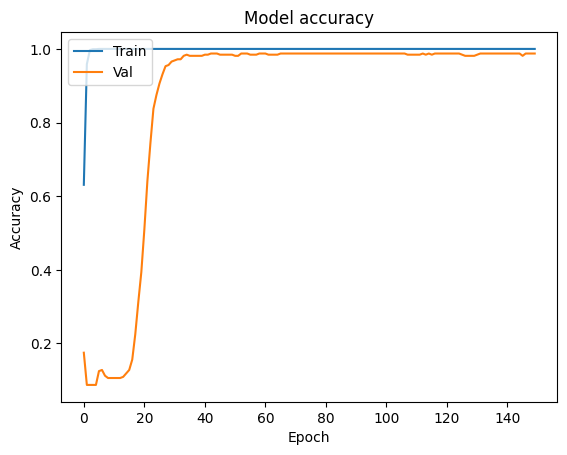

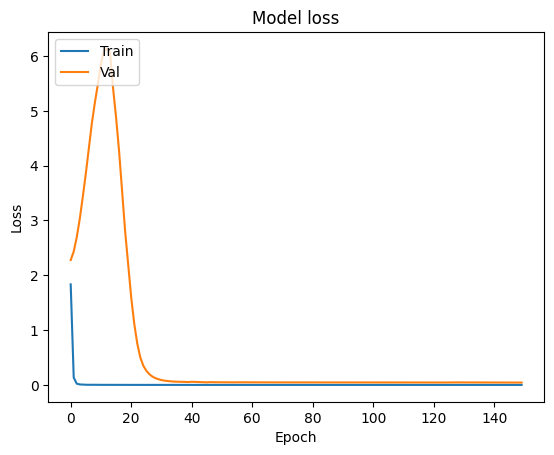

Validation Accuracy: 98.75%
Validation loss: 0.04


<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
## We show the final results
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.clf()


# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
plt.clf()

# We print the final accuracy and loss for the test set.
val_acc = hist.history['val_accuracy'][-1]
val_loss = hist.history['val_loss'][-1]
print("Validation Accuracy: {:.2f}%".format(val_acc * 100))
print("Validation loss: {:.2f}".format(val_loss))

2023-04-14 01:28:21.950762: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


13/13 [==============================] - 3s 115ms/step
Testing Accuracy: 66.50%
Testing loss: 1.58


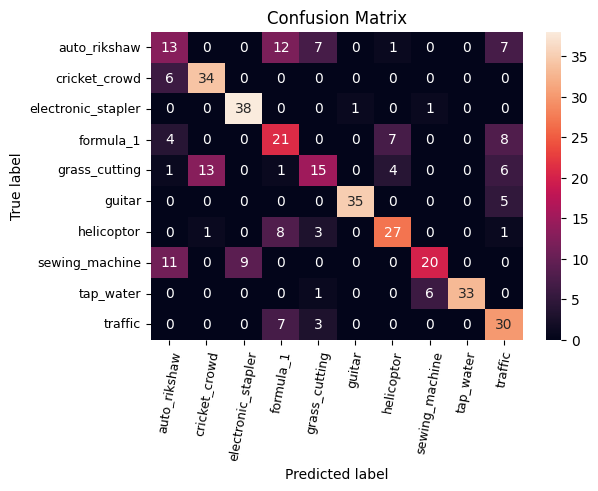

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test).argmax(axis=-1)
y_true = y_test.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

1/7 [===>..........................] - ETA: 1s

2023-04-14 01:33:49.610675: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


7/7 [==============================] - 1s 102ms/step
Testing Accuracy: 16.00%
Testing loss: 7.93


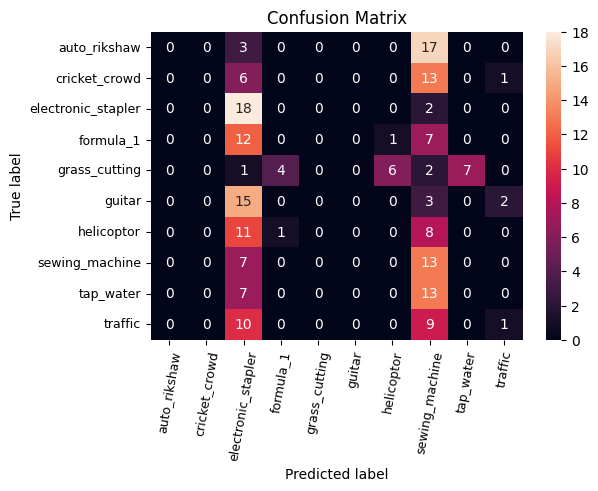

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_final_005).argmax(axis=-1)
y_true = y_final_005.argmax(axis=-1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(6, 4))
conf=sns.heatmap(cm, annot=True, fmt='d')
conf.set_xticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])
conf.set_yticklabels(['auto_rikshaw','cricket_crowd','electronic_stapler','formula_1','grass_cutting','guitar','helicoptor','sewing_machine','tap_water','traffic'])

# We print the final accuracy and loss for the test set.
test_loss, test_accuracy = model.evaluate(X_final_005, y_final_005, verbose=0)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Testing loss: {:.2f}".format(test_loss))

# Customize the plot,1,1
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

13/13 [==============================] - 0s 7ms/step


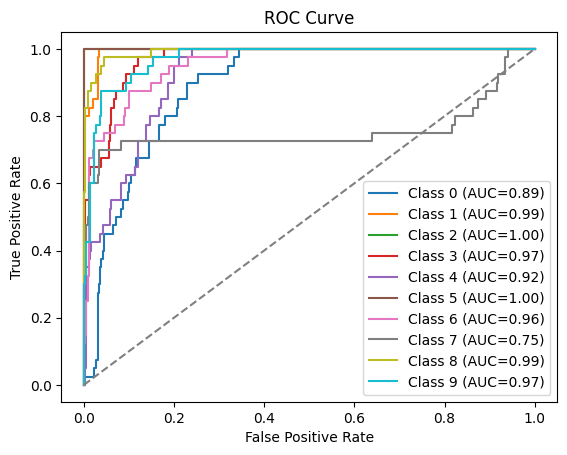

In [30]:
# We draw the ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(X_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()